In [14]:
import numpy as np
import gcsfs
import xarray as xr
import matplotlib.pyplot as plt
import intake
%matplotlib inline
from tqdm.autonotebook import tqdm
import time
import cftime
import cdo
cdo = cdo.Cdo()

In [2]:
cat_url = "/space/hall4/sitestore/eccc/crd/CMIP6/final/canesm_final.json" #use this inside of CCCma science net
#cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"       # use this outside of CCCma / for public data
col = intake.open_esm_datastore(cat_url)

In [37]:
 query = dict(experiment_id=['esm-hist'], table_id=['Amon', 'fx'], 
             variable_id=['tas', 'co2', 'ps', 'areacella'], source_id='CanESM5')
cat = col.search(**query)

[data, areacella] = dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True}, 
                                storage_options={'token': 'anon'}).values()

data = data.load()


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
                
--> There is/are 2 group(s)
[########################################] | 100% Completed | 16.8s


In [38]:
sco2 = data.co2.isel(plev=0).mean(dim=['lat','lon'])#.groupby("time.year").mean(dim='time')

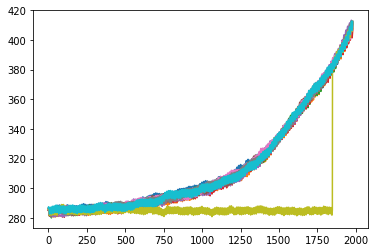

In [51]:
_=plt.plot(sco2.T)

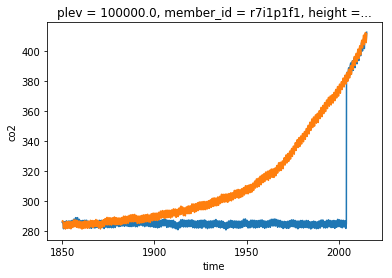

In [48]:
sco2.sel(member_id='r8i1p1f1').plot()
sco2.sel(member_id='r7i1p1f1').plot()

In [46]:
tas = data.tas.mean(dim=['lat','lon']).groupby("time.year").mean(dim='time')

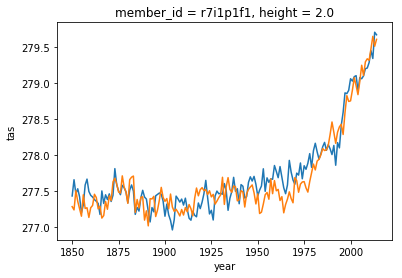

In [47]:
tas.sel(member_id='r8i1p1f1').plot()
tas.sel(member_id='r7i1p1f1').plot()